In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('Financial_inclusion_dataset.csv')
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [4]:
data.bank_account.value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [14]:
dx= data.copy()
dx.drop(['uniqueid', 'country'], axis= 1, inplace= True)
dx.head(3)

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [40]:
dp= data[['age_of_respondent', 'household_size', 'job_type', 'education_level',
        'relationship_with_head', 'marital_status', 'gender_of_respondent', 'bank_account']]

In [41]:
dp

,age_of_respondent,household_size,job_type,education_level,relationship_with_head,marital_status,gender_of_respondent,bank_account
0,24,3,Self employed,Secondary education,Spouse,Married/Living together,Female,Yes
1,70,5,Government Dependent,No formal education,Head of Household,Widowed,Female,No
2,26,5,Self employed,Vocational/Specialised training,Other relative,Single/Never Married,Male,Yes
3,34,5,Formally employed Private,Primary education,Head of Household,Married/Living together,Female,No
4,26,8,Informally employed,Primary education,Child,Single/Never Married,Male,No
...,...,...,...,...,...,...,...,...
23519,48,4,Other Income,No formal education,Head of Household,Divorced/Seperated,Female,No
23520,27,2,Other Income,Secondary education,Head of Household,Single/Never Married,Female,No
23521,27,5,Other Income,Primary education,Parent,Widowed,Female,No
23522,30,7,Self employed,Secondary education,Parent,Divorced/Seperated,Female,No


In [42]:
# -----------seperate dataset into numerical and categorical columns
num= dp.select_dtypes(include='number')
cat= dp.select_dtypes(exclude= 'number')

display(num.head())
display(cat.head())

,age_of_respondent,household_size
0,24,3
1,70,5
2,26,5
3,34,5
4,26,8


,job_type,education_level,relationship_with_head,marital_status,gender_of_respondent,bank_account
0,Self employed,Secondary education,Spouse,Married/Living together,Female,Yes
1,Government Dependent,No formal education,Head of Household,Widowed,Female,No
2,Self employed,Vocational/Specialised training,Other relative,Single/Never Married,Male,Yes
3,Formally employed Private,Primary education,Head of Household,Married/Living together,Female,No
4,Informally employed,Primary education,Child,Single/Never Married,Male,No


In [54]:
dp.education_level.value_counts()

education_level
2    3252
3    1608
0    1001
4     709
5     527
1      15
Name: count, dtype: int64

In [56]:
xtrain.education_level.value_counts()

education_level
2    2617
3    1296
0     785
4     558
5     422
1      11
Name: count, dtype: int64

In [46]:
# --------scaling and encoding of the datasets
from sklearn.preprocessing import LabelEncoder

encode= LabelEncoder()

for i in cat:
    if i in dp.columns:
        dp[i]= encode.fit_transform(dp[i])
dp.head()

,age_of_respondent,household_size,job_type,education_level,relationship_with_head,marital_status,gender_of_respondent,bank_account
0,24,3,9,3,5,2,0,1
1,70,5,4,0,1,4,0,0
2,26,5,9,5,3,3,1,1
3,34,5,3,2,1,2,0,0
4,26,8,5,2,0,3,1,0


In [57]:
import pickle 
pickle.dump(encode,open('encode.pkl', "wb"))

<Axes: xlabel='bank_account', ylabel='count'>

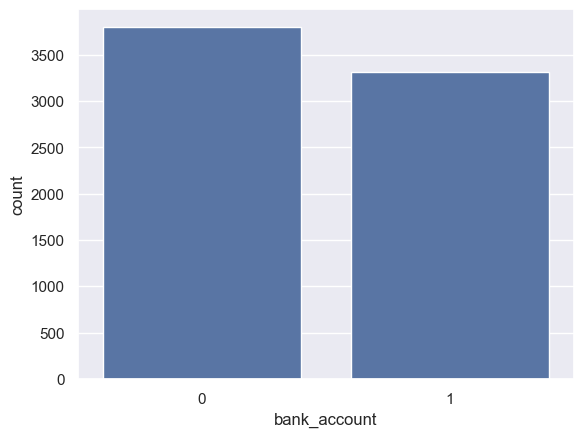

In [58]:
# -----------modelling
sns.countplot(x= dp.bank_account)

In [47]:
# ----------undersample the dependent column
class_0= dp.loc[dp['bank_account']== 0]
class_1= dp.loc[dp['bank_account']== 1]

newclass_0= class_0.sample(3800)

dp= pd.concat([newclass_0, class_1], axis= 0)
display(dp)

,age_of_respondent,household_size,job_type,education_level,relationship_with_head,marital_status,gender_of_respondent,bank_account
23016,25,1,9,2,1,2,1,0
5105,42,9,5,2,5,2,0,0
8168,49,7,5,2,5,2,0,0
23375,27,6,9,3,1,2,1,0
9527,25,6,8,3,4,3,0,0
...,...,...,...,...,...,...,...,...
23327,24,1,7,3,1,3,0,1
23331,26,3,7,3,1,2,0,1
23351,36,5,6,2,1,4,0,1
23358,50,10,9,2,1,4,0,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

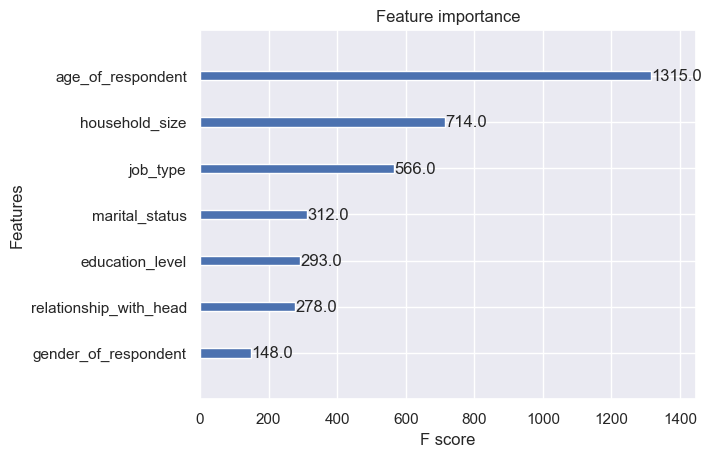

In [38]:
# ------------using xgboost to find feature of importance
# - Using XGBOOST to find feature importance
x = dp.drop('bank_account', axis = 1)
y = dp['bank_account']

import xgboost as xgb
boost = xgb.XGBClassifier()
boost.fit(x, y)

# Print feature importance scores
xgb.plot_importance(boost)

In [48]:
dp.columns

Index(['age_of_respondent', 'household_size', 'job_type', 'education_level',
       'relationship_with_head', 'marital_status', 'gender_of_respondent',
       'bank_account'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x= dp.drop('bank_account', axis= 1)
y= dp.bank_account

xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size= 0.2, random_state= 42, stratify=y)

regress= LogisticRegression()
regress.fit(xtrain, ytrain)

cross_val= regress.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      3400
           1       0.62      0.72      0.67      2289

    accuracy                           0.71      5689
   macro avg       0.70      0.71      0.71      5689
weighted avg       0.72      0.71      0.71      5689



In [51]:
xtrain.columns

Index(['age_of_respondent', 'household_size', 'job_type', 'education_level',
       'relationship_with_head', 'marital_status', 'gender_of_respondent'],
      dtype='object')

In [26]:
y_pred= regress.predict(xtest)
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       849
           1       0.60      0.69      0.64       574

    accuracy                           0.69      1423
   macro avg       0.69      0.69      0.69      1423
weighted avg       0.70      0.69      0.70      1423



<Axes: >

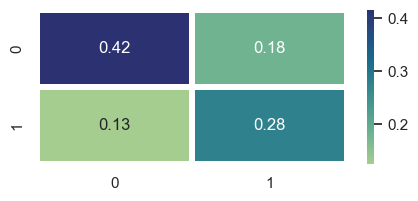

In [27]:
revealer= confusion_matrix(y_pred, ytest)
plt.figure(figsize=(5,2))
sns.set(style= 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap= 'crest', linewidths=4)

In [28]:
output= pd.concat([xtest.reset_index(drop= True),ytest.reset_index(drop = True)], axis=1)
output['Predicted'] = pd.Series(y_pred)

output

,age_of_respondent,household_size,job_type,education_level,relationship_with_head,marital_status,gender_of_respondent,bank_account,Predicted
0,30,2,9,2,1,3,1,0,0
1,37,4,1,2,5,2,0,0,0
2,54,4,3,4,1,3,1,1,1
3,16,7,5,2,0,3,1,0,0
4,31,3,8,3,5,2,0,1,0
...,...,...,...,...,...,...,...,...,...
1418,23,2,1,0,1,4,0,0,0
1419,39,8,1,3,5,2,0,0,1
1420,32,1,3,3,1,2,0,1,1
1421,22,3,9,3,0,3,0,1,0


In [29]:
coefs = regress.coef_
intercept = regress.intercept_

coefs, intercept

(array([[ 2.73396654e-02,  5.52948460e-05, -4.71587504e-02,
          9.37824656e-01, -2.98356167e-02, -8.51221411e-02,
          4.70399490e-01]]),
 array([-3.15005875]))

<hr><h5><li>Random Forest Preduiction

In [16]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
clf.fit(xtrain, ytrain)  #Training our model
prediction=clf.predict(xtest)  #testing our model
print("Accuracy:", metrics.accuracy_score(ytest, prediction))  #Measuring the accuracy of our model

Accuracy: 0.6964160224877021


In [30]:
import pickle
pickle.dump(regress, open('Inclusion_model.pkl', "wb"))